In [1]:
# Explore a dataset using Python (Pandas) to calculate mean, median, mode, and standard deviation.

In [3]:
pip install pandas numpy scipy scikit-learn

  Using cached pandas-2.3.3-cp310-cp310-macosx_11_0_arm64.whl.metadata (91 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
Using cached pandas-2.3.3-cp310-cp310-macosx_11_0_arm64.whl (10.8 MB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)

[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
from sklearn import datasets
import pandas as pd
import numpy as np
from scipy import stats

In [5]:
data = datasets.load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
mean = df.mean()
median = df.median()
mode = df.mode().iloc[0]
std_dev = df.std()

In [8]:
print("Mean:\n", mean)
print("\nMedian:\n", median)
print("\nMode:\n", mode)
print("\nStandard Deviation:\n", std_dev)

Mean:
 sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

Median:
 sepal length (cm)    5.80
sepal width (cm)     3.00
petal length (cm)    4.35
petal width (cm)     1.30
dtype: float64

Mode:
 sepal length (cm)    5.0
sepal width (cm)     3.0
petal length (cm)    1.4
petal width (cm)     0.2
Name: 0, dtype: float64

Standard Deviation:
 sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
dtype: float64


In [10]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [11]:

# Clean a messy dataset by removing duplicates, filling missing values, and converting data types.

In [5]:
data = pd.read_csv("/Users/divyeshmedidi/Downloads/MLlab/emp.csv")
data.head()
data1 = data.copy()

In [6]:
for _ in range(data1.shape[1]):
    col = data1.columns[_]
    if data1[col].dtype == 'object':
        data1[col] = data1[col].str.strip()
    if data1[col].isnull().sum() > 0:
        if data1[col].dtype == 'object':
            data1[col].fillna(data1[col].mode()[0], inplace=True)
        else:
            data1[col].fillna(data1[col].mean(), inplace=True)

/var/folders/p1/yw1zg1xj0jz7g2tq3wtk6yh80000gn/T/ipykernel_7973/3408598399.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data1[col].fillna(data1[col].mean(), inplace=True)
/var/folders/p1/yw1zg1xj0jz7g2tq3wtk6yh80000gn/T/ipykernel_7973/3408598399.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [19]:
data.isna().sum()

Emp_ID          0
Name            0
Age             0
Sal             0
Experience      0
Dept            0
Joining_Date    0
Per_score       0
dtype: int64

In [7]:
data1.duplicated().sum()
data1.drop_duplicates(inplace=True)

In [22]:
data.duplicated().sum()

np.int64(0)

In [24]:
data.shape

(44, 8)

In [25]:
data.dtypes

Emp_ID          float64
Name             object
Age             float64
Sal             float64
Experience      float64
Dept             object
Joining_Date     object
Per_score       float64
dtype: object

In [26]:
data.Emp_ID = data.Emp_ID.astype(int)

In [27]:
data.dtypes

Emp_ID            int64
Name             object
Age             float64
Sal             float64
Experience      float64
Dept             object
Joining_Date     object
Per_score       float64
dtype: object

In [28]:
# Use an open API (like COVID-19 or weather) to collect JSON data and convert it to a CSV file.

In [30]:
%pip install requests pandas


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [36]:
from scipy import stats
import requests
import pandas as pd

In [42]:
# Example: Get air quality data for Berlin
free_api_url = "https://air-quality-api.open-meteo.com/v1/air-quality?latitude=52.52&longitude=13.41&hourly=pm10,pm2_5"
response = requests.get(free_api_url)
data = response.json()

In [44]:
data_in_csv = pd.json_normalize(data, record_path=['hourly', 'time'], meta=['latitude', 'longitude'])
data_in_csv.to_csv("air_quality_berlin.csv", index=False)

In [45]:
data1 = pd.read_csv("air_quality_berlin.csv")
data1.head()

,0,latitude,longitude
0,2026-01-11T00:00,52.5,13.400002
1,2026-01-11T01:00,52.5,13.400002
2,2026-01-11T02:00,52.5,13.400002
3,2026-01-11T03:00,52.5,13.400002
4,2026-01-11T04:00,52.5,13.400002


In [46]:
# Visualize data using Matplotlib and Seaborn to create bar, line, and scatter plots.

In [53]:
%pip install matplotlib seaborn


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [55]:

import matplotlib.pyplot as plt
import seaborn as sns

data 

{'latitude': 52.5,
 'longitude': 13.400002,
 'generationtime_ms': 0.13685226440429688,
 'utc_offset_seconds': 0,
 'timezone': 'GMT',
 'timezone_abbreviation': 'GMT',
 'elevation': 38.0,
 'hourly_units': {'time': 'iso8601', 'pm10': 'μg/m³', 'pm2_5': 'μg/m³'},
 'hourly': {'time': ['2026-01-11T00:00',
   '2026-01-11T01:00',
   '2026-01-11T02:00',
   '2026-01-11T03:00',
   '2026-01-11T04:00',
   '2026-01-11T05:00',
   '2026-01-11T06:00',
   '2026-01-11T07:00',
   '2026-01-11T08:00',
   '2026-01-11T09:00',
   '2026-01-11T10:00',
   '2026-01-11T11:00',
   '2026-01-11T12:00',
   '2026-01-11T13:00',
   '2026-01-11T14:00',
   '2026-01-11T15:00',
   '2026-01-11T16:00',
   '2026-01-11T17:00',
   '2026-01-11T18:00',
   '2026-01-11T19:00',
   '2026-01-11T20:00',
   '2026-01-11T21:00',
   '2026-01-11T22:00',
   '2026-01-11T23:00',
   '2026-01-12T00:00',
   '2026-01-12T01:00',
   '2026-01-12T02:00',
   '2026-01-12T03:00',
   '2026-01-12T04:00',
   '2026-01-12T05:00',
   '2026-01-12T06:00',
   '2026-0

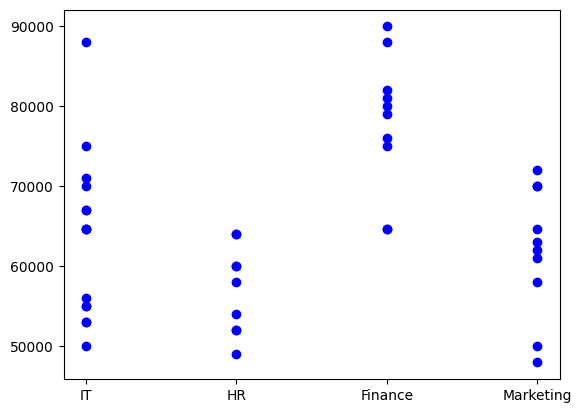

In [64]:
plt.scatter(data1['Dept'], data1['Sal'],color='blue')
plt.show()

<BarContainer object of 44 artists>

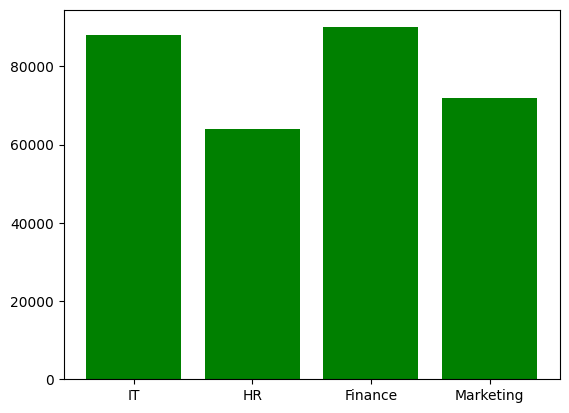

In [65]:
plt.bar(data1['Dept'], data1['Sal'],color='green')

In [66]:
data1.head()

,Emp_ID,Name,Age,Sal,Experience,Dept,Joining_Date,Per_score
0,101.0,John,25.0,50000.000000,2.0,IT,6/15/2019,85.0
1,102.0,Alice,30.0,60000.000000,5.0,HR,4/22/2018,90.0
2,103.0,Bob,35.0,64658.536585,10.0,Finance,7/11/2015,78.0
3,104.0,Eve,28.0,55000.000000,4.0,IT,1/5/2020,88.0
4,105.0,Mike,40.0,75000.000000,12.0,Finance,9/18/2010,92.0


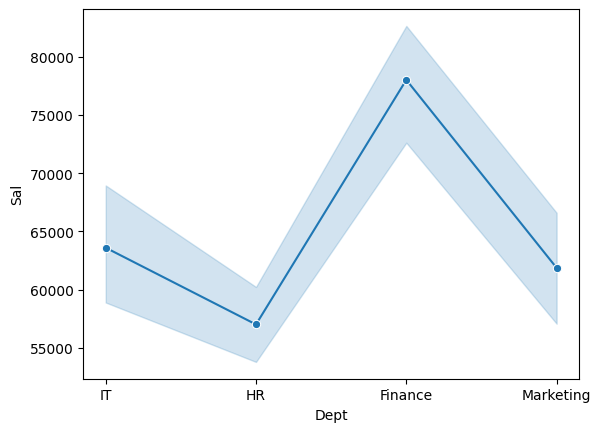

In [68]:
sns.lineplot(x='Dept', y='Sal', data=data2, marker='o')
plt.show()

In [75]:
data2 = data1.copy()
data2.drop(columns=['Emp_ID', 'Name', 'Joining_Date','Dept'], axis=1, inplace=True)

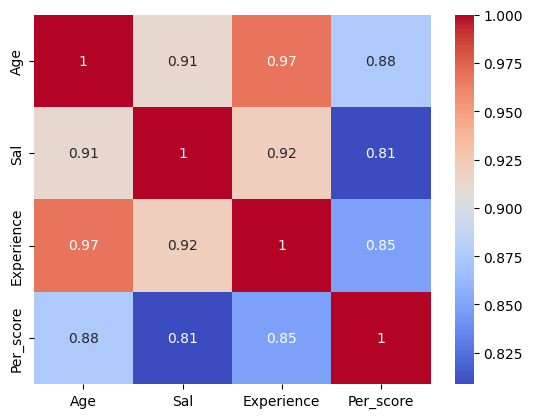

In [76]:
sns.heatmap(data2.corr(), annot=True, cmap='coolwarm')
plt.show()

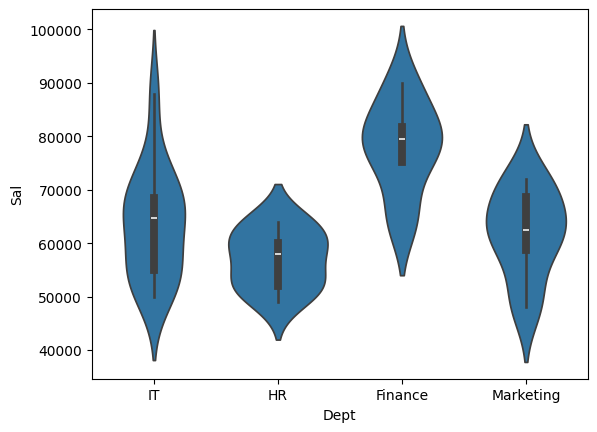

In [77]:
sns.violinplot(x='Dept', y='Sal', data=data1)
plt.show()

In [9]:

import streamlit as st
import plotly.express as px

# Build an interactive dashboard in Plotly or Streamlit with dropdown filters and live charts.
data1.head()

st.title("Employee Salary Dashboard")
dept_options = data1['Dept'].unique().tolist()
selected_dept = st.selectbox("Select Department", dept_options)
filtered_data = data1[data1['Dept'] == selected_dept]
fig = px.bar(filtered_data, x='Name', y='Sal', title=f'Salary Distribution in {selected_dept} Department')
st.plotly_chart(fig)




2026-01-11 20:24:41.358 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-11 20:24:41.359 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-11 20:24:41.360 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-11 20:24:41.360 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-11 20:24:41.361 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-11 20:24:41.361 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-11 20:24:41.361 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-11 20:24:41.361 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

In [14]:
mode = data1.mode().iloc[0]
mode

Emp_ID                 101.0
Name                 Abigail
Age                33.488372
Sal             64658.536585
Experience               2.0
Dept                      IT
Joining_Date       11/8/2005
Per_score               89.0
Name: 0, dtype: object

In [23]:
data.isna().sum()


Emp_ID          2
Name            2
Age             5
Sal             7
Experience      3
Dept            4
Joining_Date    2
Per_score       4
dtype: int64

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Dept', y='Sal', data=data1)
plt.show()


/var/folders/p1/yw1zg1xj0jz7g2tq3wtk6yh80000gn/T/ipykernel_7973/736119378.py:5: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



In [34]:
# seaborn bar plot

import matplotlib.pyplot as plt

sns.barplot(x='Dept', y='Sal', data=data1)

<Axes: xlabel='Dept', ylabel='Sal'>

In [ ]:
st.title("Employee Salary Dashboard")
dept_options = data1['Dept'].unique().tolist()

ValueError: could not convert string to float: '6/15/2019'

In [39]:
# Simple API example - JSONPlaceholder (fake REST API for testing)
api = "https://jsonplaceholder.typicode.com/users"
response = requests.get(api)
json_data = response.json()

# Convert to DataFrame
df_api = pd.DataFrame(json_data)
print(f"Fetched {len(df_api)} records")
df_api.head()

Fetched 10 records


,id,name,username,email,address,phone,website,company
0,1,Leanne Graham,Bret,Sincere@april.biz,"{'street': 'Kulas Light', 'suite': 'Apt. 556',...",1-770-736-8031 x56442,hildegard.org,"{'name': 'Romaguera-Crona', 'catchPhrase': 'Mu..."
1,2,Ervin Howell,Antonette,Shanna@melissa.tv,"{'street': 'Victor Plains', 'suite': 'Suite 87...",010-692-6593 x09125,anastasia.net,"{'name': 'Deckow-Crist', 'catchPhrase': 'Proac..."
2,3,Clementine Bauch,Samantha,Nathan@yesenia.net,"{'street': 'Douglas Extension', 'suite': 'Suit...",1-463-123-4447,ramiro.info,"{'name': 'Romaguera-Jacobson', 'catchPhrase': ..."
3,4,Patricia Lebsack,Karianne,Julianne.OConner@kory.org,"{'street': 'Hoeger Mall', 'suite': 'Apt. 692',...",493-170-9623 x156,kale.biz,"{'name': 'Robel-Corkery', 'catchPhrase': 'Mult..."
4,5,Chelsey Dietrich,Kamren,Lucio_Hettinger@annie.ca,"{'street': 'Skiles Walks', 'suite': 'Suite 351...",(254)954-1289,demarco.info,"{'name': 'Keebler LLC', 'catchPhrase': 'User-c..."


In [ ]:
# Save JSON data to CSV
df_api.to_csv("api_users_data.csv", index=False)
print("Data saved to api_users_data.csv")

# Verify by reading it back
verify_df = pd.read_csv("api_users_data.csv")
verify_df.head()